In [1]:
'''
What is PCA: A method of using mathematical formulas to combine multiple variables into one variable
the new variable will be called a Principal Component or PC

Benefit 1: It helps with dimensionality reduction, which makes things faster by reducing the size of dataset 
to be stored and processed

Benefit 2: Removes Correlated Features, PCA does this for you efficiently.  After implementing the PCA on your dataset, all the 
Principal Components are independent of one another. There is no correlation among them.

Improves Algorithm Performance
Improves Visualization: It is very hard to visualize and understand the data in high dimensions. PCA transforms a high dimensional data 
to low dimensional data (2 dimension) so that it can be visualized easily. 
We can use 2D Scree Plot to see which Principal Components result in high variance and have more impact as compared to other 
Principal Components. 

How to know how many Principal Components to use, using a Scree Plot look for where the line is under 1.

'''

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)



FILE   = "IRIS.csv"

df = pd.read_csv( FILE, encoding="ISO-8859-1" )
TARGET = "Species"


X = df.copy()
X = X.drop( [TARGET], axis=1 )
varNames = X.columns

print( X.head() )
print( "\n\n")

   SepalLength  SepalWidth  PetalLength  PetalWidth
0          5.1         3.5          1.4         0.2
1          4.9         3.0          1.4         0.2
2          4.7         3.2          1.3         0.2
3          4.6         3.1          1.5         0.2
4          5.0         3.6          1.4         0.2





In [2]:
theScaler = StandardScaler()
theScaler.fit( X )

X_STD = theScaler.transform( X )

#the shape arguement here is just telling us how many variables we have so MAX_N = 4, we are creating 4 Principal Components
MAX_N = X_STD.shape[1]
pca = PCA(n_components=MAX_N)
pca.fit( X_STD )

#this is telling us how much information is in each of the components
#the 1st variable has as much info as almost 3 variables, the 2nd has almost 1, so we can do with out the third and 4th PC
ev = pca.explained_variance_
print("Eigen Values")
print(ev)
print("\n\n")

Eigen Values
[2.93808505 0.9201649  0.14774182 0.02085386]





In [3]:
# we see that 73% of the information contained in all 4 PC is in the 1st PC, the 1st and 2nd PCs combined 
#we get 96% of the information

varPCT = []
totPCT = []
total = 0
for i in ev:
    total = total + i
    VAR = int( i / len(ev) * 100)
    PCT = int( total / len(ev) * 100)
    varPCT.append(VAR)
    totPCT.append( PCT )
    print( round(i,2), "variation=", VAR,"%"," total=", PCT,"%")

2.94 variation= 73 %  total= 73 %
0.92 variation= 23 %  total= 96 %
0.15 variation= 3 %  total= 100 %
0.02 variation= 0 %  total= 100 %


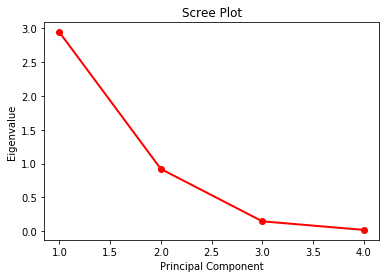

In [4]:
PC_NUM = np.arange( MAX_N ) + 1
plt.plot( PC_NUM , ev, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

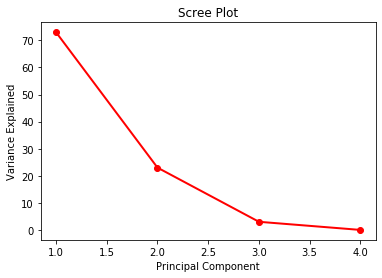

In [5]:
#Another way of looking at the Scree Plot with Variance%
PC_NUM = np.arange( MAX_N ) + 1
plt.plot( PC_NUM , varPCT, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

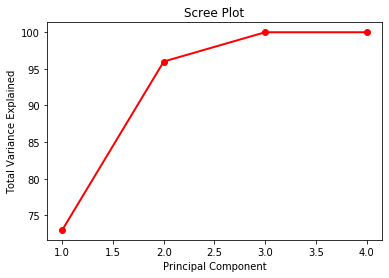

In [6]:
##Another way of looking at the Scree Plot with Cumulative Variance%
PC_NUM = np.arange( MAX_N ) + 1
plt.plot( PC_NUM , totPCT, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Total Variance Explained')
plt.show()

In [7]:
dfc = pd.DataFrame( pca.components_ )
dfc.columns = varNames
print( dfc )

   SepalLength  SepalWidth  PetalLength  PetalWidth
0     0.521066   -0.269347     0.580413    0.564857
1     0.377418    0.923296     0.024492    0.066942
2    -0.719566    0.244382     0.142126    0.634273
3    -0.261286    0.123510     0.801449   -0.523597


In [8]:
pca = PCA(n_components=MAX_N)
pca.fit( X_STD )


X_PCA = pca.transform( X_STD )
X_PCA = pd.DataFrame( X_PCA )
# taking all the rows = :  and only taking columns 0 and 1, stopping at 2 not including 2
X_PCA = X_PCA.iloc[:,0:2]


colNames = X_PCA.columns
pcaNames = []
for i in colNames :
    index = int(i) + 1
    theName = "PC_" + str(index)
    pcaNames.append( theName )
    
X_PCA.columns = pcaNames

print( X_PCA.head() )
print("\n\n")

       PC_1      PC_2
0 -2.264703  0.480027
1 -2.080961 -0.674134
2 -2.364229 -0.341908
3 -2.299384 -0.597395
4 -2.389842  0.646835





In [9]:
print( df.head() )
print("\n\n")

   SepalLength  SepalWidth  PetalLength  PetalWidth Species
0          5.1         3.5          1.4         0.2  setosa
1          4.9         3.0          1.4         0.2  setosa
2          4.7         3.2          1.3         0.2  setosa
3          4.6         3.1          1.5         0.2  setosa
4          5.0         3.6          1.4         0.2  setosa





In [10]:
X_PCA["TARGET"] = df.Species
print( X_PCA.head() )
print("\n\n")

       PC_1      PC_2  TARGET
0 -2.264703  0.480027  setosa
1 -2.080961 -0.674134  setosa
2 -2.364229 -0.341908  setosa
3 -2.299384 -0.597395  setosa
4 -2.389842  0.646835  setosa





In [11]:
for Name, Group in X_PCA.groupby("TARGET"):
    print( Group.head() )
    print("\n")

       PC_1      PC_2  TARGET
0 -2.264703  0.480027  setosa
1 -2.080961 -0.674134  setosa
2 -2.364229 -0.341908  setosa
3 -2.299384 -0.597395  setosa
4 -2.389842  0.646835  setosa


        PC_1      PC_2      TARGET
50  1.101781  0.862972  versicolor
51  0.731337  0.594615  versicolor
52  1.240979  0.616298  versicolor
53  0.407483 -1.754404  versicolor
54  1.075475 -0.208421  versicolor


         PC_1      PC_2     TARGET
100  1.844569  0.870421  virginica
101  1.157882 -0.698870  virginica
102  2.205267  0.562010  virginica
103  1.440151 -0.046988  virginica
104  1.867812  0.295045  virginica




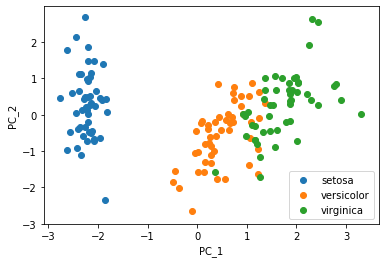

In [12]:
for Name, Group in X_PCA.groupby("TARGET"):
    plt.scatter(Group.PC_1, Group.PC_2, label=Name)
plt.xlabel("PC_1")
plt.ylabel("PC_2")
plt.legend()
plt.show()